Q1. Create a file “people.txt” with the following data:

        Age	agegroup	height	status	    yearsmarried

        21	adult	        6.0	single	        -1

        2	child	        3	married	        0

        18	adult	        5.7	married	        20

        221	elderly	        5	widowed	        2

        34	child	        -7	married	        3

i)	Read the data from the file “people.txt”.

ii)	Create a ruleset E that contain rules to check for the following conditions:
1.	The age should be in the range 0-150.
2.	The age should be greater than yearsmarried.
3.	The status should be married or single or widowed.
4.	If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

iii)	Check whether ruleset E is violated by the data in the file people.txt.

iv) 	Summarize the results obtained in part (iii)

v)	 Visualize the results obtained in part (iii)


In [4]:
import pandas as pd
import numpy as np
!pip install matplotlib
df = pd.read_csv("people.txt",sep=" ")
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [6]:
df[(df.Age>0)&(df.Age<150)]

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
4,34,child,-7.0,married,3


In [7]:
df[(df.status=='married')|(df.status=='single')|(df.status=='widowed')]

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [8]:
df[(df.Age>df.yearsmarried)]

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [9]:
def ruleset(df):
    df['Rule1']=df['Age'].apply(lambda x:True if x>0 and x<150 else False)
    df['Rule2']=df.apply(lambda x:True if x.Age>x.yearsmarried else False,axis=1)
    df['Rule3']=df['status'].apply(lambda x: True if x=='married' or x=='single' or x=='widowed' else False)
    df['Rule4']=df.apply(lambda x:True if(x.Age<=18 and x.agegroup=='child')or (18<x.Age<65 and x.agegroup=='adult') or 
                        (x.Age>65 and x.agegroup=='elderly')
                        else False,axis=1)
    return df

In [10]:
df_after_rule=ruleset(df)
df_after_rule.head()

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,False
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [11]:
df_after_rule['Rule1']=df_after_rule['Rule1'].astype(int)
df_after_rule['Rule2']=df_after_rule['Rule2'].astype(int)
df_after_rule['Rule3']=df_after_rule['Rule3'].astype(int)
df_after_rule['Rule4']=df_after_rule['Rule4'].astype(int)


In [12]:
df_after_rule[['Rule1','Rule2','Rule3','Rule4']].describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.600000
std,0.447214,0.447214,0.0,0.547723
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,0.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


<AxesSubplot:>

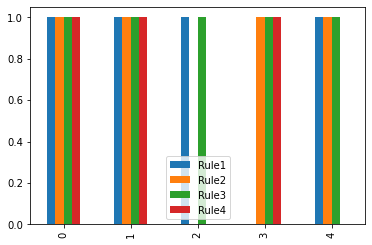

In [13]:
df_after_rule.plot(y=['Rule1','Rule2','Rule3','Rule4'],kind='bar')